### Customer Segmentation: 
        To segment different customers on the basis of their purchases using kmeans clustering

### Importing libraries & Dataset

In [1]:
# Libraries
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans

In [2]:
# Dataset
data=pd.read_csv('F:\DataSet/data.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Checking missing values

In [3]:
data.isnull().sum() #no missing values

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Bivariate Analysis
a) Age v/s Spending Score

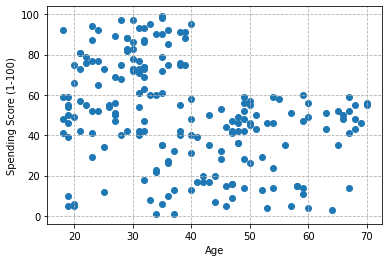

In [4]:
plt.scatter(data['Age'],data['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.grid(linestyle = '--')
plt.show()

In [5]:
# Taking only 'Age' and 'Spending Score (1-100)' columns
x=data[['Age','Spending Score (1-100)']]
x

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


### Initializing centroids and finding out the best no. of groups

In [6]:
# Creating empty list, wcss, to store the sum of squared distance within a cluster.
wcss=[]
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


C:\Users\nupur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### Visualizing to find the best no. of cluster (Elbow method)

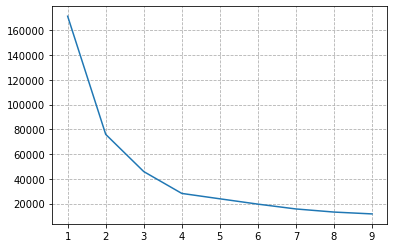

In [7]:
no_of_clusters=range(1,10)
plt.plot(no_of_clusters,wcss)
plt.grid(linestyle = '--')
plt.show()

In [8]:
# Taking k = 4 and fitting the data
kmeans = KMeans(4)

### Fitting and predicting the data clusters

In [9]:
identified_clusters=kmeans.fit_predict(x)
identified_clusters

array([1, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 1, 2, 3, 1, 3,
       2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 0, 1,
       2, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 3, 1, 3, 0, 3, 2, 3, 2, 3,
       1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

### Merging the original dataset with number of clusters

In [10]:
table_with_clusters=data.copy()
table_with_clusters['Clusters']=identified_clusters
table_with_clusters

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,1
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,2
197,198,Male,32,126,74,3
198,199,Male,32,137,18,2


### Visualizing the number of clusters in the form of scatterplot

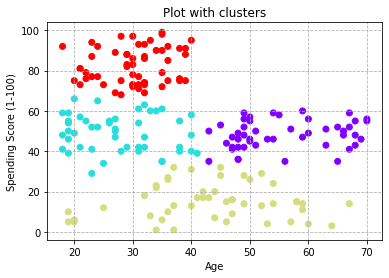

In [11]:
plt.scatter(table_with_clusters['Age'],table_with_clusters['Spending Score (1-100)'],c=table_with_clusters['Clusters'],cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Plot with clusters')
plt.grid(linestyle = '--')
plt.show()

b) Gender v/s Spending Score

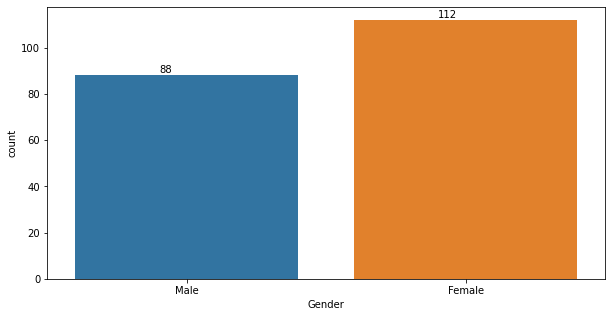

In [12]:
plt.figure(1 , figsize = (10 , 5))
ax=sns.countplot(x = 'Gender' , data = data)
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+1))

plt.show()  

### Converting into numeric categorical feature (One Hot encoding)

In [13]:
Gender=pd.get_dummies(data['Gender'],drop_first=True)
Gender.head()

,Male
0,1
1,1
2,0
3,0
4,0


In [14]:
# Merging with original dataset and dropping the 'Gender' column
data=pd.concat([data,Gender],axis=1)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Male
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [15]:
data.drop(['Gender'],axis=1,inplace=True)
data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [16]:
x=data[['Male','Spending Score (1-100)']]
x

,Male,Spending Score (1-100)
0,1,39
1,1,81
2,0,6
3,0,77
4,0,40
...,...,...
195,0,79
196,0,28
197,1,74
198,1,18


### Again finding the best number of clusters w.r.t gender

In [17]:

wcss=[]
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\nupur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### Elbow method

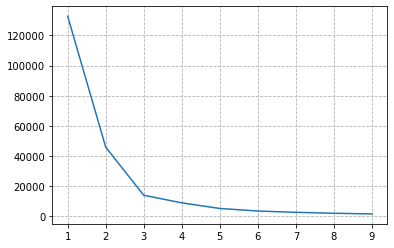

In [18]:
no_of_clusters=range(1,10)
plt.plot(no_of_clusters,wcss)
plt.grid(linestyle = '--')

In [19]:
# Taking K = 3
kmeans = KMeans(3)

In [20]:
identified_clusters=kmeans.fit_predict(x)
identified_clusters 

array([0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1,
       2, 1, 2, 1, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 0,
       2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

### Merging the original dataset with number of clusters

In [21]:
table_with_clusters=data.copy()
table_with_clusters['Clusters']=identified_clusters
table_with_clusters

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Male,Clusters
0,1,19,15,39,1,0
1,2,21,15,81,1,1
2,3,20,16,6,0,2
3,4,23,16,77,0,1
4,5,31,17,40,0,0
...,...,...,...,...,...,...
195,196,35,120,79,0,1
196,197,45,126,28,0,2
197,198,32,126,74,1,1
198,199,32,137,18,1,2


### Visualizing clusters

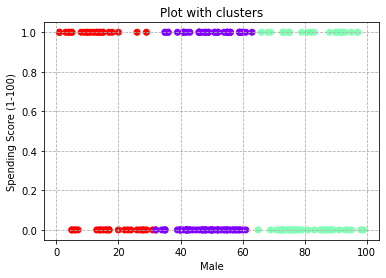

In [22]:
plt.scatter(table_with_clusters['Spending Score (1-100)'],table_with_clusters['Male'],c=table_with_clusters['Clusters'],cmap='rainbow')
plt.xlabel('Male')
plt.ylabel('Spending Score (1-100)')
plt.title('Plot with clusters')
plt.grid(linestyle = '--')
plt.show()

c) Annual Income (k$) v/s Spending Score (1-100)

In [23]:
data=pd.read_csv('data.csv')
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

In [ ]:
plt.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(linestyle = '--')
plt.show()

In [24]:
x=data[['Annual Income (k$)','Spending Score (1-100)']]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


### Finding the best cluster based on Annual Income

In [25]:

wcss=[]
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\nupur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### Elbow method

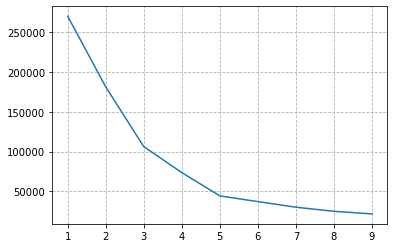

In [26]:
no_of_clusters=range(1,10)
plt.plot(no_of_clusters,wcss)
plt.grid(linestyle = '--')
plt.show()

In [27]:
# Taking k=5
kmeans = KMeans(5)

In [28]:
identified_clusters=kmeans.fit_predict(x)
identified_clusters 

array([2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 3,
       2, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 1, 4, 3, 4, 1, 4, 1, 4,
       3, 4, 1, 4, 1, 4, 1, 4, 1, 4, 3, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [29]:
table_with_clusters=data.copy()
table_with_clusters['Clusters']=identified_clusters
table_with_clusters

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Male,Clusters
0,1,19,15,39,1,2
1,2,21,15,81,1,0
2,3,20,16,6,0,2
3,4,23,16,77,0,0
4,5,31,17,40,0,2
...,...,...,...,...,...,...
195,196,35,120,79,0,4
196,197,45,126,28,0,1
197,198,32,126,74,1,4
198,199,32,137,18,1,1


### Visualizing number of clusters

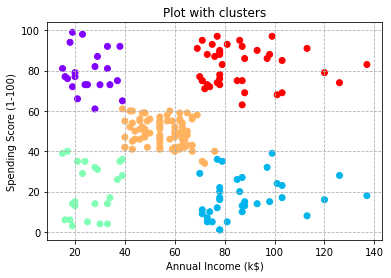

In [30]:
plt.scatter(table_with_clusters['Annual Income (k$)'],table_with_clusters['Spending Score (1-100)'],c=table_with_clusters['Clusters'],cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Plot with clusters')
plt.grid(linestyle = '--')
plt.show()